In [ ]:
#libraries 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_data = pd.read_csv("/content/drive/MyDrive/3rd year/dataScience/weatherAUS.csv")
csv_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
csv_data.shape

(145460, 23)

In [ ]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

([<matplotlib.patches.Wedge at 0x7f80c0f79e10>,
 [Text(-0.6343483909086427, 0.898666856488886, 'numeric(16)'),
  Text(0.6343483909086426, -0.898666856488886, 'non-numeric(7)')])

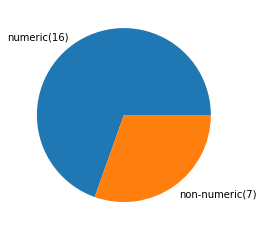

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
non_numeric_columns = len(csv_data.select_dtypes(exclude=numerics).columns)
numeric_columns = len(csv_data.select_dtypes(include=numerics).columns)

plt.pie([numeric_columns,non_numeric_columns],labels=["numeric("+str(numeric_columns)+")","non-numeric("+str(non_numeric_columns)+")"])

In [ ]:
csv_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
csv_data.isna().sum()
print("Percentage of Null Value for each Column")
a=[]
for i in csv_data:
  sz = len(csv_data[i])
  nl = csv_data[i].isna().sum()
  percent = (nl*100)/sz
  print(i," : ",percent)
  if (percent <= 5.0):
    a.append(i)
print(a)

Percentage of Null Value for each Column
Date  :  0.0
Location  :  0.0
MinTemp  :  1.0208992162793895
MaxTemp  :  0.8669049910628351
Rainfall  :  2.241853430496356
Evaporation  :  43.1665062560154
Sunshine  :  48.00976213391998
WindGustDir  :  7.09885879279527
WindGustSpeed  :  7.055547916953114
WindDir9am  :  7.263852605527292
WindDir3pm  :  2.906641000962464
WindSpeed9am  :  1.214766946239516
WindSpeed3pm  :  2.105046060772721
Humidity9am  :  1.8245565791282827
Humidity3pm  :  3.09844630826344
Pressure9am  :  10.356799120033
Pressure3pm  :  10.331362573903478
Cloud9am  :  38.42155919153032
Cloud3pm  :  40.80709473394748
Temp9am  :  1.214766946239516
Temp3pm  :  2.4810944589577892
RainToday  :  2.241853430496356
RainTomorrow  :  2.245978275814657
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


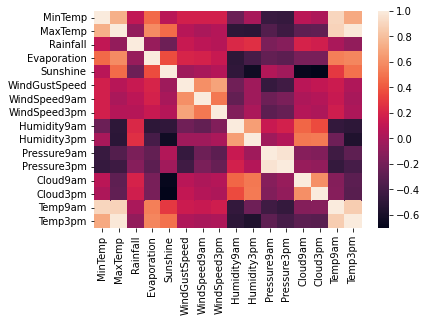

In [ ]:
sea = csv_data.corr()
sns.heatmap(sea)

In [ ]:
csv_data[["MinTemp","MaxTemp"]].median()

csv_data[["MinTemp","MaxTemp"]].mean()

MinTemp    12.194034
MaxTemp    23.221348
dtype: float64

In [ ]:
csv_data[["Location","MaxTemp"]].groupby("Location").mean()
#dono same result denge
csv_data.groupby("Location")["MaxTemp"].mean()

Location
Adelaide            22.898934
Albany              20.070998
Albury              22.640872
AliceSprings        29.248420
BadgerysCreek       24.031208
Ballarat            18.287266
Bendigo             21.621746
Brisbane            26.448380
Cairns              29.558849
Canberra            20.976639
Cobar               25.870093
CoffsHarbour        23.965385
Dartmoor            19.697454
Darwin              32.540977
GoldCoast           25.767062
Hobart              17.865727
Katherine           34.935436
Launceston          18.954911
Melbourne           20.769358
MelbourneAirport    20.491858
Mildura             24.840944
Moree               26.950548
MountGambier        19.828995
MountGinini         11.663676
Newcastle           24.101070
Nhil                22.405153
NorahHead           22.588937
NorfolkIsland       21.830253
Nuriootpa           21.704133
PearceRAAF          26.051238
Penrith             24.764366
Perth               25.034837
PerthAirport        25.533234
P

In [ ]:
csv_data[["Location","MaxTemp"]].groupby("Location").mean()
#dono same result denge
csv_data.groupby("Location")["MinTemp"].mean()

Location
Adelaide            12.579505
Albany              12.948438
Albury               9.530604
AliceSprings        13.142284
BadgerysCreek       11.131719
Ballarat             7.367950
Bendigo              8.593713
Brisbane            16.423807
Cairns              21.220467
Canberra             6.821866
Cobar               13.149451
CoffsHarbour        14.437108
Dartmoor             8.620034
Darwin              23.209305
GoldCoast           17.363286
Hobart               9.078578
Katherine           20.553564
Launceston           7.836190
Melbourne           11.779174
MelbourneAirport     9.973945
Mildura             10.731572
Moree               12.905853
MountGambier         8.825477
MountGinini          3.577280
Newcastle           13.760007
Nhil                 8.999809
NorahHead           15.355481
NorfolkIsland       16.871875
Nuriootpa            9.363242
PearceRAAF          12.303850
Penrith             12.577449
Perth               12.922706
PerthAirport        12.580359
P

In [ ]:
csv_data.groupby("Location").describe()

MinTemp                       ... Temp3pm              
                   count       mean       std  ...     50%     75%   max
Location                                       ...                      
Adelaide          3191.0  12.579505  4.986596  ...   20.40  25.900  44.3
Albany            2977.0  12.948438  3.545188  ...   18.50  20.625  36.8
Albury            3029.0   9.530604  6.069485  ...   20.60  27.200  43.4
AliceSprings      3039.0  13.142284  7.748471  ...   28.50  34.200  43.2
BadgerysCreek     2973.0  11.131719  5.633795  ...   21.70  26.500  43.7
Ballarat          3039.0   7.367950  4.719704  ...   15.40  21.600  43.1
Bendigo           3038.0   8.593713  5.697443  ...   19.30  25.600  44.4
Brisbane          3184.0  16.423807  4.616583  ...   24.90  27.600  36.3
Cairns            3039.0  21.220467  3.176509  ...   28.00  29.800  38.0
Canberra          3430.0   6.821866  6.242953  ...   18.80  24.500  39.5
Cobar             3003.0  13.149451  6.725802  ...   24.40  30.600  45.2
CoffsHarbour      2994.0  14.437108  5.142664  ...   22.40  25.200  37.4
Dartmoor          2940.0   8.620034  4.170732  ...   16.70  21.500  43.4
Darwin            3192.0  23.209305  2.968970  ...   31.50  32.600  37.4
GoldCoast         3037.0  17.363286  4.115452  ...   23.80  26.300  33.9
Hobart            3193.0   9.078578  3.897084  ...   15.70  19.100  40.3
Katherine         1529.0  20.553564  5.100651  ...   33.80  36.000  41.0
Launceston        3034.0   7.836190  4.943563  ...   17.20  21.100  38.2
Melbourne         2713.0  11.779174  4.208313  ...   18.20  22.500  45.4
MelbourneAirport  3009.0   9.973945  4.481929  ...   17.80  22.800  46.1
Mildura           3009.0  10.731572  6.057556  ...   22.40  28.700  46.1
Moree             3007.0  12.905853  6.811774  ...   26.00  31.000  46.7
MountGambier      3038.0   8.825477  3.999872  ...   16.80  21.600  44.1
MountGinini       2949.0   3.577280  5.374270  ...   10.00  15.700  30.0
Newcastle         2693.0  13.760007  5.003698  ...   22.00  26.000  43.5
Nhil              1573.0   8.999809  5.107077  ...   19.70  25.600  43.2
NorahHead         2974.0  15.355481  4.149259  ...   20.60  23.600  40.2
NorfolkIsland     3008.0  16.871875  2.761056  ...   20.30  22.700  27.6
Nuriootpa         2998.0   9.363242  5.151055  ...   19.10  25.400  42.4
PearceRAAF        2987.0  12.303850  5.243401  ...   23.60  29.500  43.5
Penrith           3011.0  12.577449  5.526524  ...   22.60  27.400  46.2
Perth             3193.0  12.922706  5.087817  ...   22.50  27.300  42.5
PerthAirport      3009.0  12.580359  5.093569  ...   23.20  28.500  42.4
Portland          3000.0   9.586867  3.586086  ...   15.60  18.800  41.4
Richmond          2989.0  11.364202  6.103940  ...   22.50  27.000  45.9
Sale              3008.0   8.567420  4.907297  ...   17.90  22.300  44.1
SalmonGums        2960.0   9.313007  5.483728  ...   22.10  27.200  44.7
Sydney            3340.0  14.866826  4.551618  ...   21.30  24.500  44.7
SydneyAirport     3008.0  14.901729  4.640967  ...   21.30  24.900  44.9
Townsville        3038.0  20.417874  4.562407  ...   28.00  30.000  37.4
Tuggeranong       3038.0   7.242133  6.348866  ...   18.85  24.475  39.6
Uluru             1543.0  14.466688  7.446991  ...   29.75  35.400  42.6
WaggaWagga        3009.0   9.617182  6.551019  ...   21.20  27.800  43.7
Walpole           2971.0  11.806631  3.226613  ...   18.30  21.100  38.8
Watsonia          3002.0  10.131879  4.542496  ...   18.10  23.500  45.2
Williamtown       3007.0  12.780180  5.104967  ...   22.00  25.750  44.2
Witchcliffe       3000.0  10.775067  3.925484  ...   19.10  22.800  38.0
Wollongong        3025.0  14.939471  3.820357  ...   19.80  22.600  39.2
Woomera           3005.0  13.363727  6.197374  ...   24.40  31.000  46.1

[49 rows x 128 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65198ce850>,
      dtype=object)

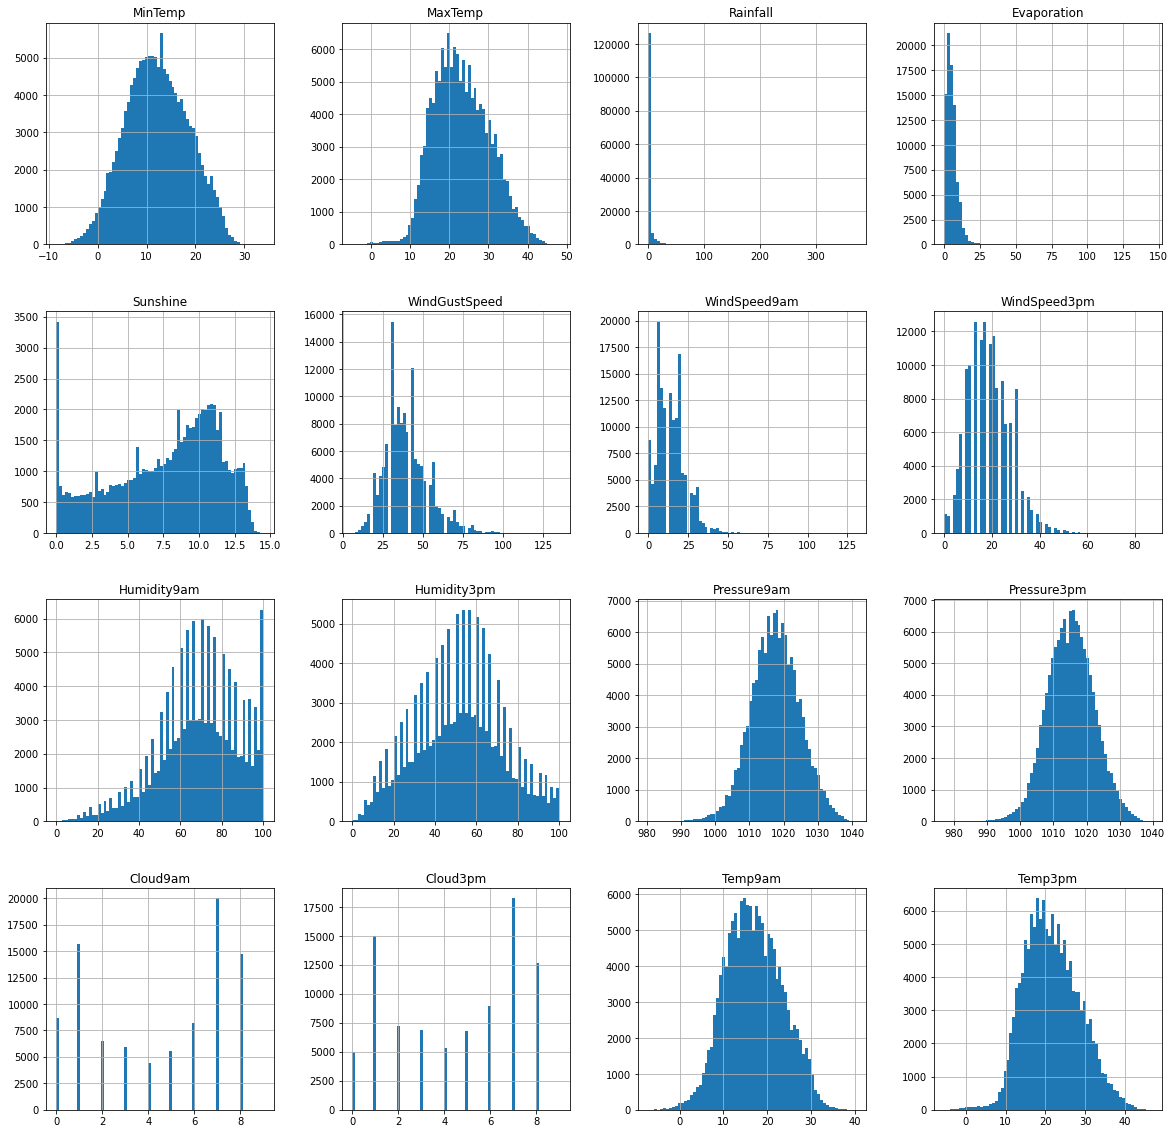

In [ ]:
csv_data.hist(bins=70,figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


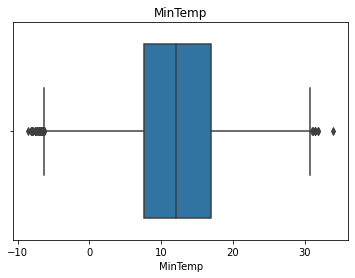

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


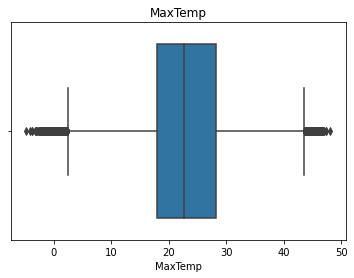

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


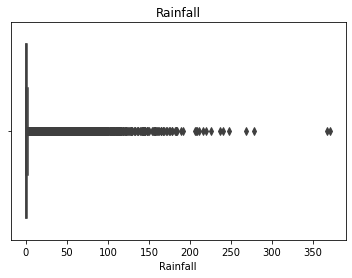

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


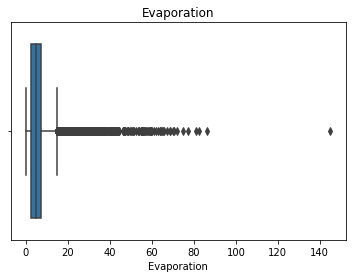

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


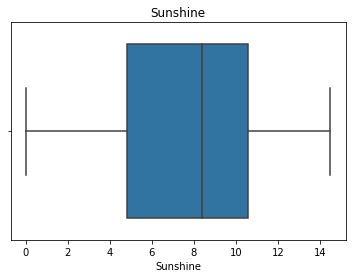

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


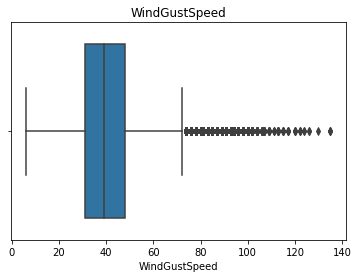

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


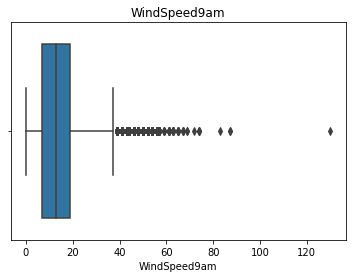

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


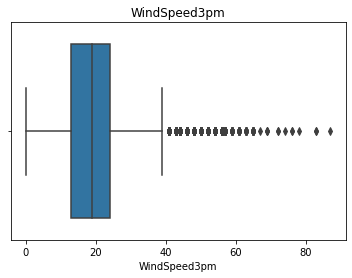

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


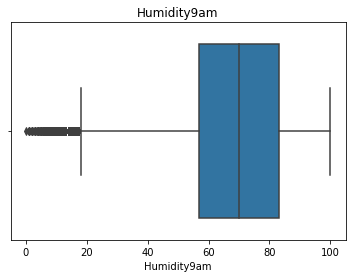

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


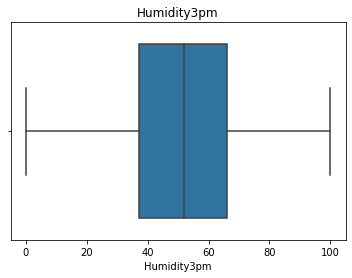

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


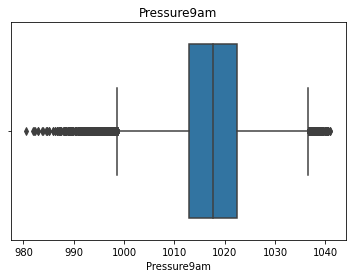

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


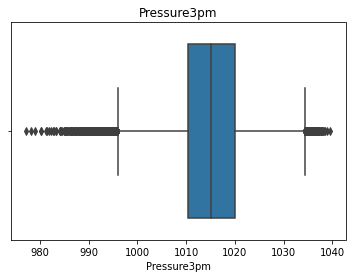

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


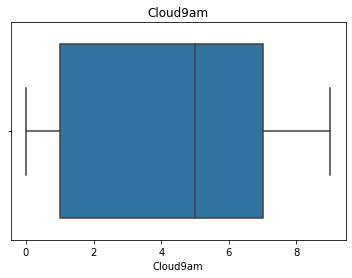

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


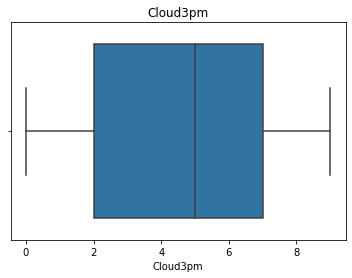

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


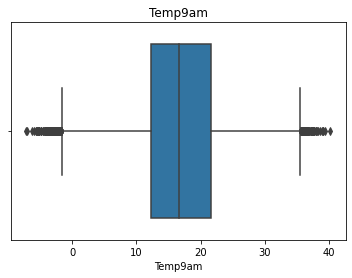

<Figure size 2880x2880 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


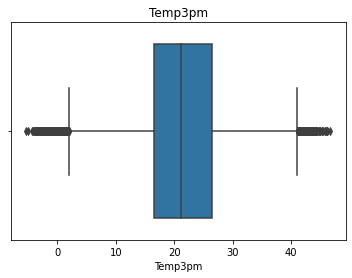

<Figure size 2880x2880 with 0 Axes>

In [ ]:
def draw_boxplot(data,feature):
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(40,40))
    plt.show()

for f in csv_data.select_dtypes(include=numerics).columns:
    draw_boxplot(csv_data,f)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6516b7af10>,
      dtype=object)

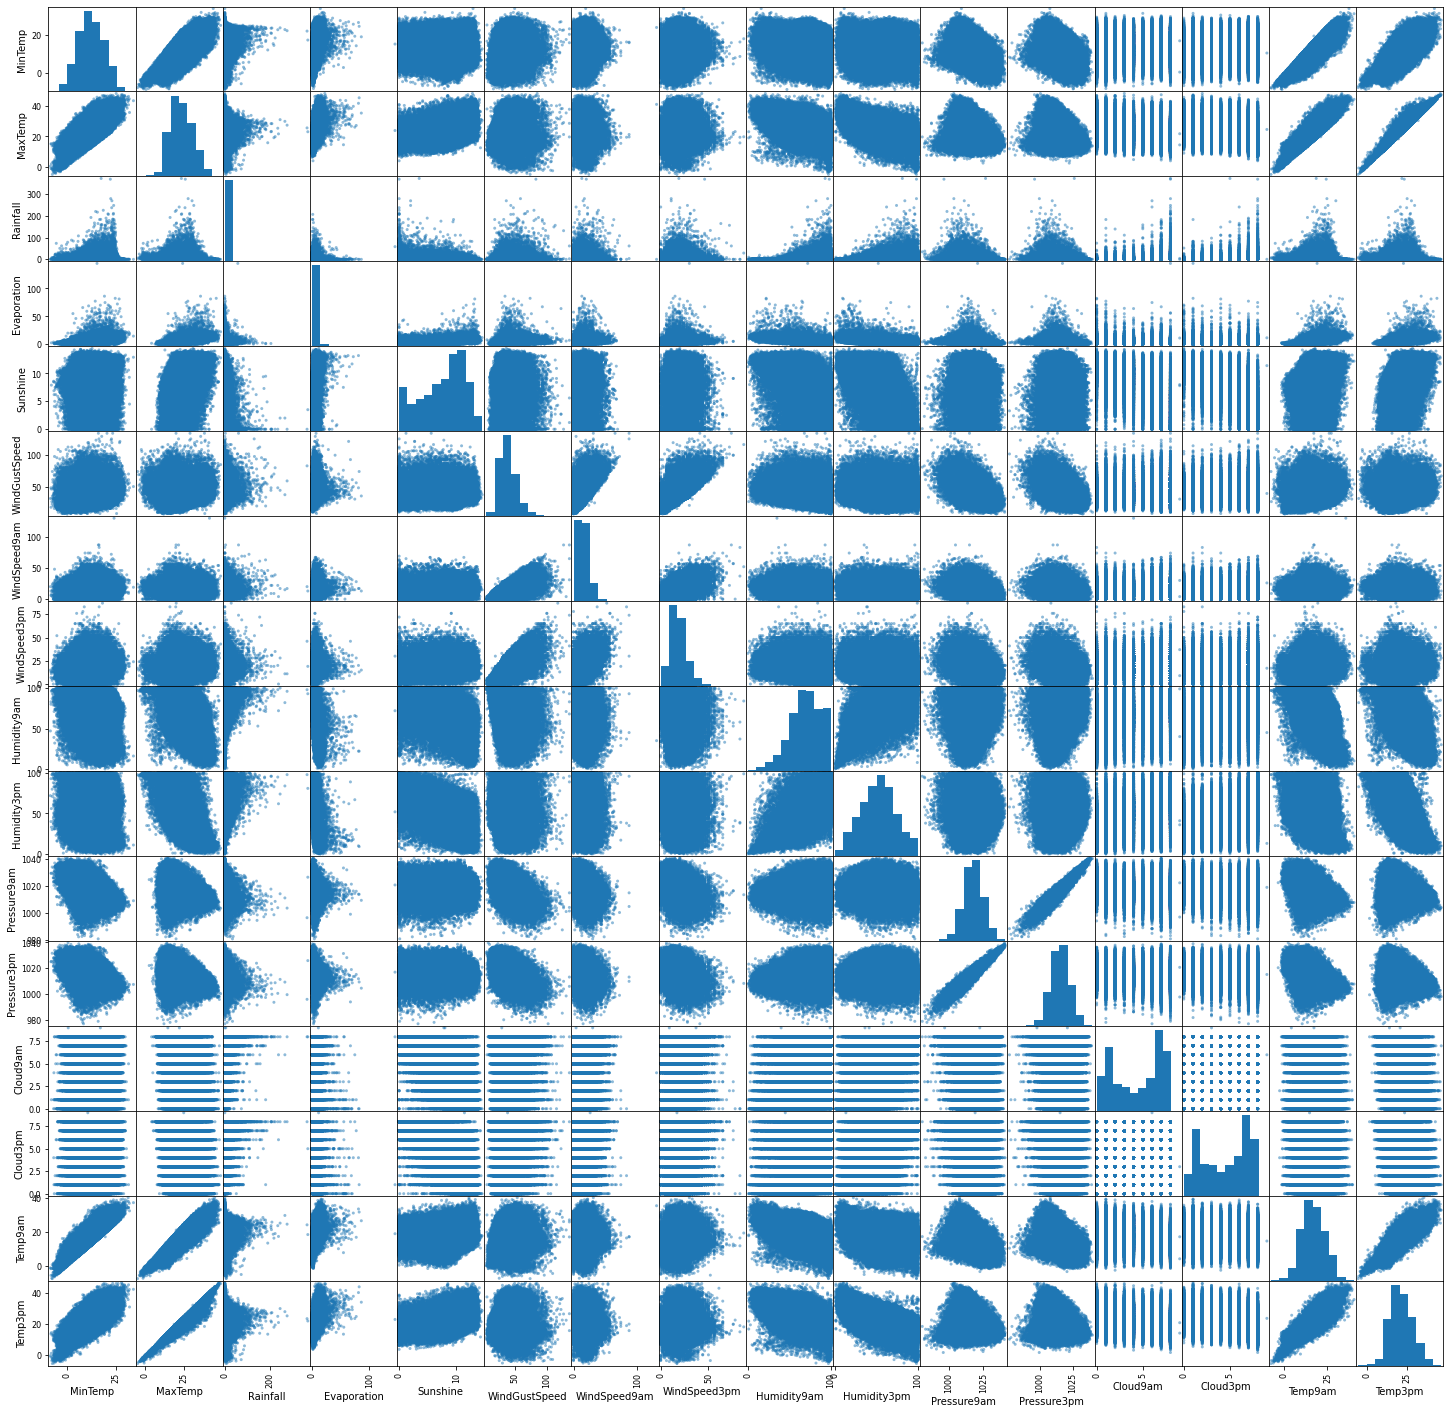

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(csv_data,figsize=(25,25))
# relation column k beech mai

In [ ]:

final_data = csv_data.drop(['Date','Location'],axis = 1)
# for i in final_data:
#   if i not in a:
#     final_data.drop(i,axis=1,inplace=True)
final_data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
final_data = pd.get_dummies(data = final_data,drop_first=True)
final_data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,14.3,25.0,0.0,NaN,NaN,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,9.7,31.9,0.0,NaN,NaN,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,13.1,30.1,1.4,NaN,NaN,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 63 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MinTemp           143975 non-null  float64
 1   MaxTemp           144199 non-null  float64
 2   Rainfall          142199 non-null  float64
 3   Evaporation       82670 non-null   float64
 4   Sunshine          75625 non-null   float64
 5   WindGustSpeed     135197 non-null  float64
 6   WindSpeed9am      143693 non-null  float64
 7   WindSpeed3pm      142398 non-null  float64
 8   Humidity9am       142806 non-null  float64
 9   Humidity3pm       140953 non-null  float64
 10  Pressure9am       130395 non-null  float64
 11  Pressure3pm       130432 non-null  float64
 12  Cloud9am          89572 non-null   float64
 13  Cloud3pm          86102 non-null   float64
 14  Temp9am           143693 non-null  float64
 15  Temp3pm           141851 non-null  float64
 16  WindGustDir_ENE   14

In [ ]:
final_data['RainToday_Yes'] = np.float64(final_data['RainToday_Yes'])

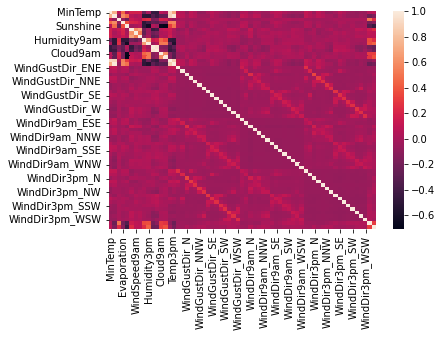

In [ ]:
sea = final_data.corr()
sns.heatmap(sea)

In [ ]:
for i in final_data:
  median = final_data[i].median()
  final_data[i].fillna(median,inplace=True)

final_data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:

print("Percentage of Null Value for each Column")

for i in final_data:
  sz = len(final_data[i])
  nl = final_data[i].isna().sum()
  percent = (nl*100)/sz
  print(i," : ",percent)

Percentage of Null Value for each Column
MinTemp  :  0.0
MaxTemp  :  0.0
Rainfall  :  0.0
WindSpeed9am  :  0.0
WindSpeed3pm  :  0.0
Humidity9am  :  0.0
Humidity3pm  :  0.0
Temp9am  :  0.0
Temp3pm  :  0.0
RainToday_Yes  :  0.0
RainTomorrow_Yes  :  0.0


In [ ]:
final_data.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,14.030751,18.669758,68.901251,51.553396,16.987101,21.668916,0.219167,0.219146
std,6.365780,7.088358,8.389771,8.861796,8.716716,18.855360,20.471345,6.449299,6.850658,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,7.000000,13.000000,57.000000,37.000000,12.300000,16.700000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,13.000000,19.000000,70.000000,52.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,19.000000,24.000000,83.000000,65.000000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,130.000000,87.000000,100.000000,100.000000,40.200000,46.700000,1.000000,1.000000


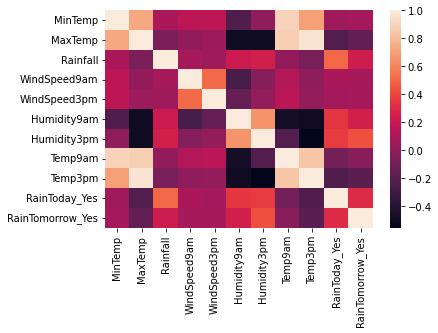

In [ ]:
sea = final_data.corr()
sns.heatmap(sea)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456e596450>,
      dtype=object)

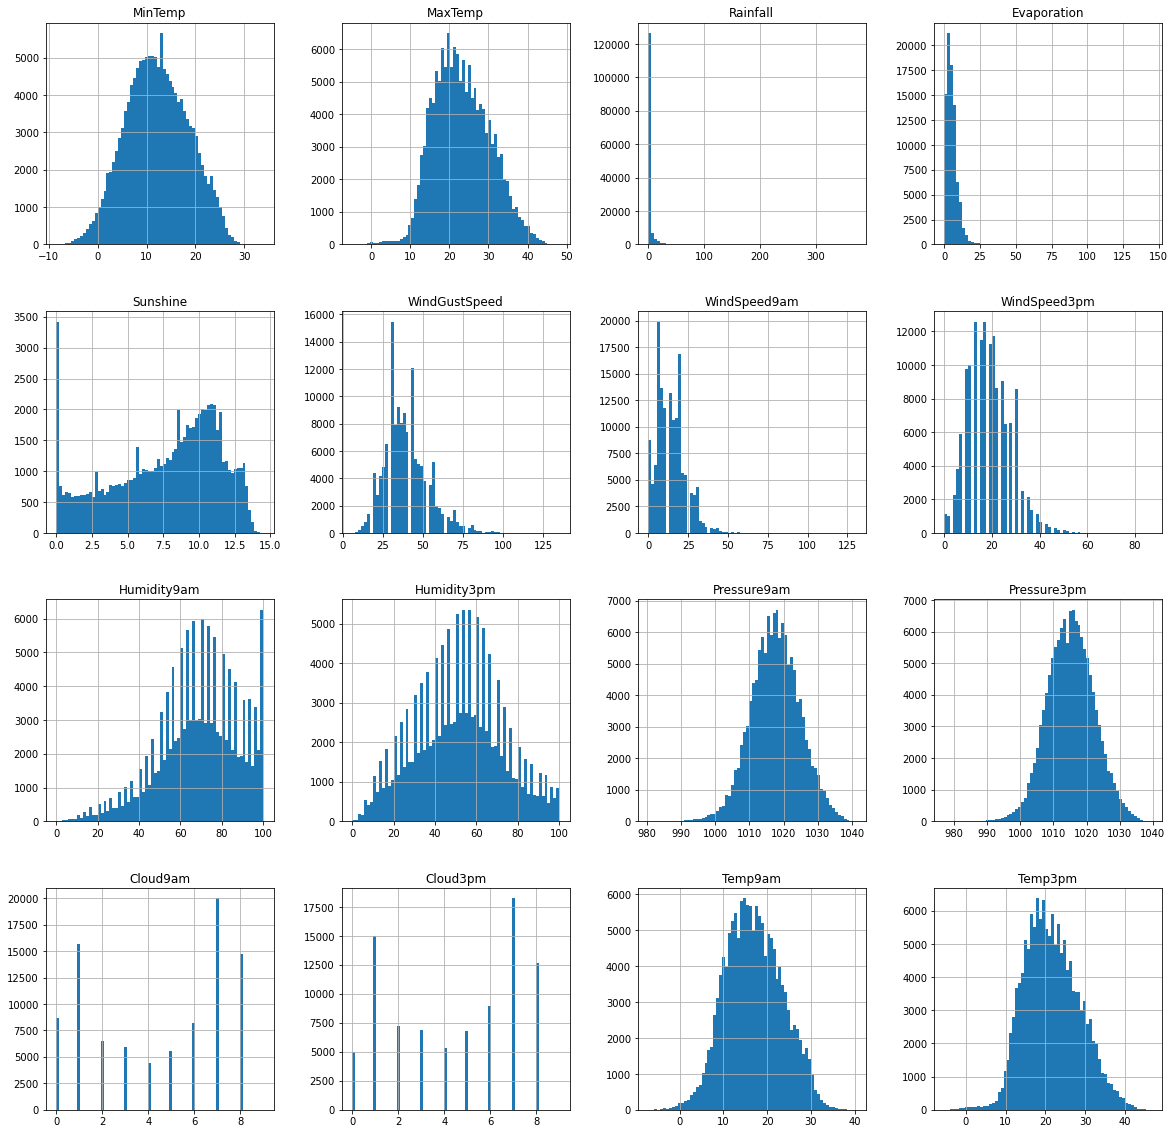

In [ ]:
csv_data.hist(bins=70,figsize=(20,20))

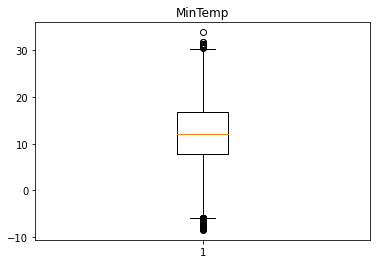

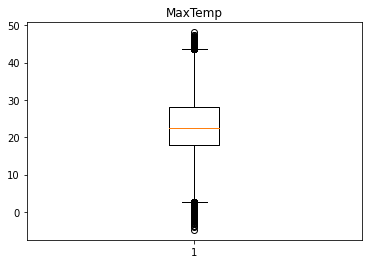

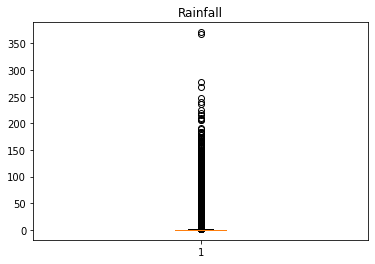

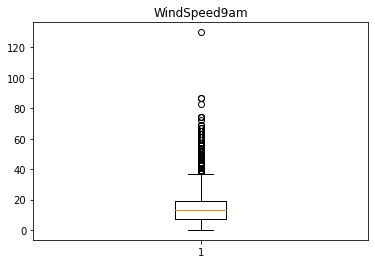

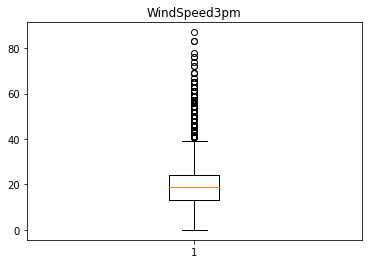

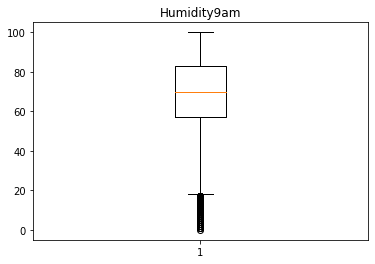

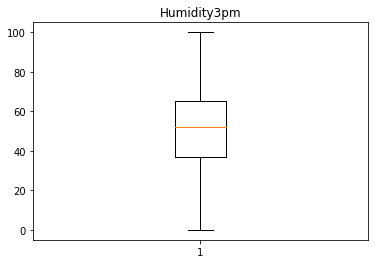

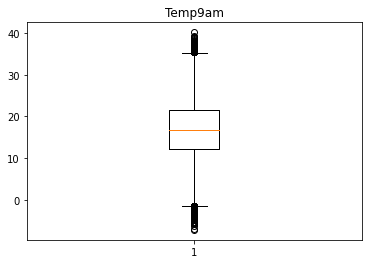

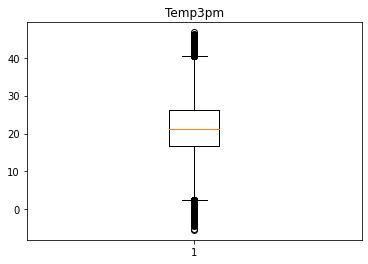

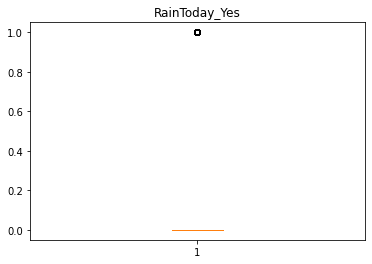

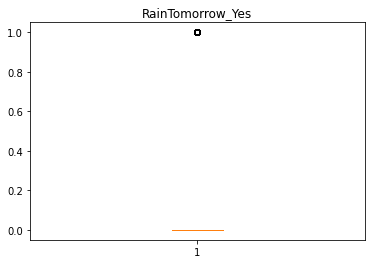

In [ ]:
for i in final_data:
  plt.boxplot(final_data[i])
  plt.title(i)
  plt.show()

In [ ]:
month_data = csv_data.drop('Location',axis = 1)
month_data['year'] = pd.DatetimeIndex(month_data['Date']).year
month_data['month'] = pd.DatetimeIndex(month_data['Date']).month
month_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12


In [ ]:
month_wise=month_data.groupby([month_data['year'],month_data['month']])['Rainfall'].agg(['sum', 'max'])
month_wise['year-month'] = month_wise.index

m=[]
y=[]
for i in month_wise['year-month']:
  m.append(i[1])
for i in month_wise['year-month']:
  y.append(i[0])

month_wise['year'] = y
month_wise['month'] = m

month_wise.drop('year-month',axis=1,inplace=True)
month_wise.head(10)

sum   max  year  month
year month                          
2007 11      95.4  39.8  2007     11
     12     101.0  22.6  2007     12
2008 1       43.8  18.8  2008      1
     2      323.0  77.4  2008      2
     3       93.4  19.8  2008      3
     4      164.0  22.8  2008      4
     5       15.8   5.2  2008      5
     6      149.0  46.4  2008      6
     7      569.4  33.2  2008      7
     8      273.6  22.0  2008      8

In [ ]:
yy = pd.DataFrame(y)
yy[0]

0      2007
1      2007
2      2008
3      2008
4      2008
       ... 
108    2017
109    2017
110    2017
111    2017
112    2017
Name: 0, Length: 113, dtype: int64

In [ ]:
month_wise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 113 entries, (2007, 11) to (2017, 6)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum            113 non-null    float64
 1   max            113 non-null    float64
 2   (year, month)  113 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
year_wise=month_data.groupby(month_data['year'])['Rainfall'].agg(['sum','max'])
year_wise['year'] = year_wise.index
year_wise.head(10)

,sum,max,year
year,,,
2007,196.4,39.8,2007
2008,5149.0,79.4,2008
2009,35949.0,371.0,2009
2010,44518.8,165.2,2010
2011,42791.6,367.6,2011
2012,36346.9,183.4,2012
2013,36583.4,208.5,2013
2014,34210.4,175.2,2014
2015,37234.1,247.2,2015


In [ ]:
month_wise.index

MultiIndex([(2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            ...
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6)],
           names=['year', 'month'], length=113)

In [ ]:
year_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2007 to 2017
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     11 non-null     float64
 1   max     11 non-null     float64
 2   year    11 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 352.0 bytes


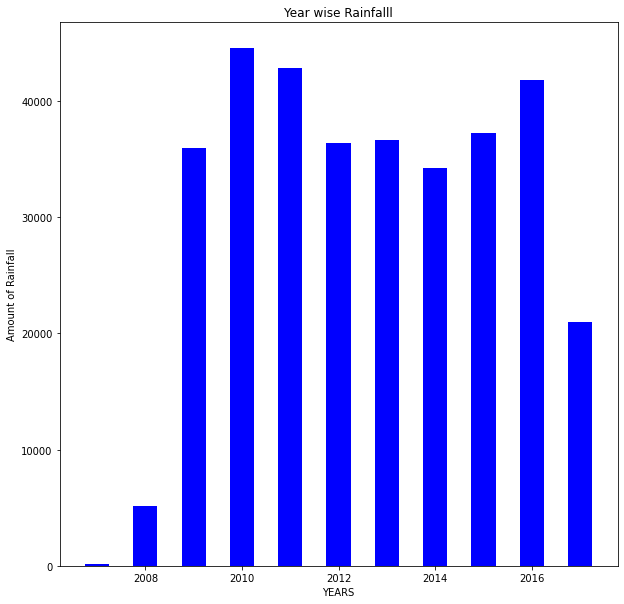

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.bar(year_wise['year'], year_wise['sum'], color ='blue',width = 0.5)
plt.xlabel("YEARS")
plt.ylabel("Amount of Rainfall")
plt.title("Year wise Rainfalll")
plt.show()

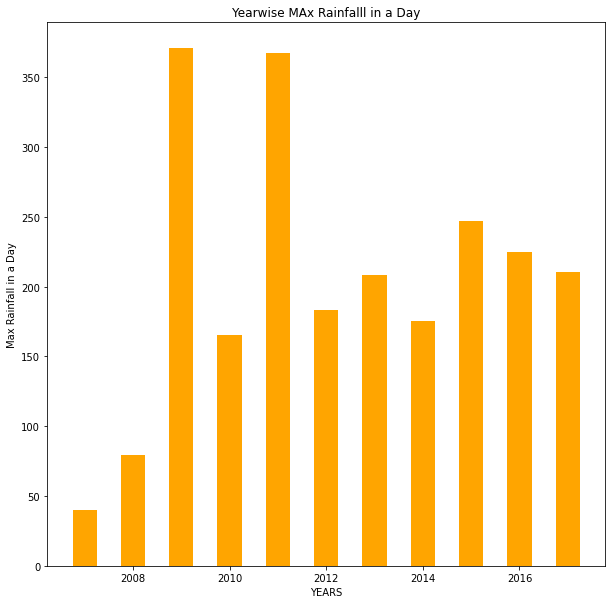

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.bar(year_wise['year'], year_wise['max'], color ='orange',width = 0.5)
plt.xlabel("YEARS")
plt.ylabel("Max Rainfall in a Day")
plt.title("Yearwise MAx Rainfalll in a Day")
plt.show()

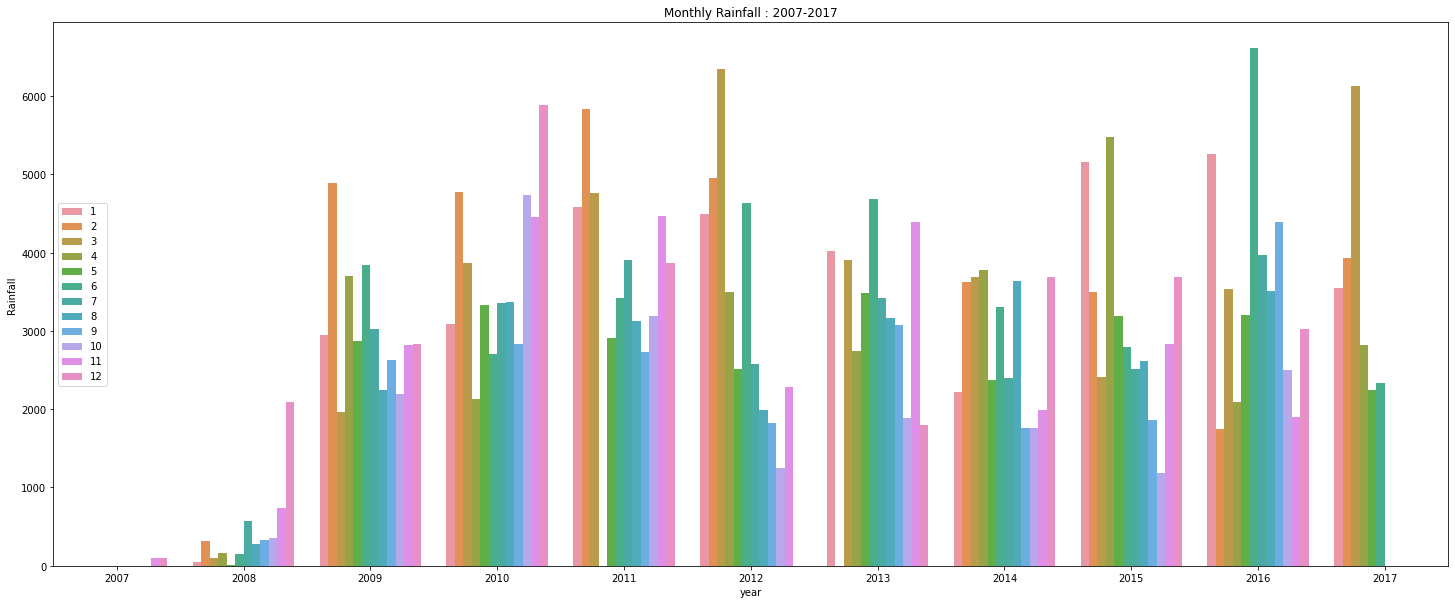

In [ ]:
plt.figure(figsize=[25,10])
sns.barplot(x='year', y='sum', data=month_wise, hue='month')
plt.legend(loc="center left")
plt.title('Monthly Rainfall : 2007-2017')
plt.ylabel('Rainfall')
plt.show()